### **Sprint - 2 Model Building**

### **Import the necessary packages**

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### **Load data**

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

### **Data Analysis**

In [4]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

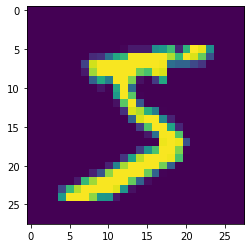

In [7]:
plt.imshow(X_train[0])

### **Data Pre-Processing**

**Reshaping Dataset**

In [8]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

**Applying One Hot Encoding**

In [9]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [10]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### **Create model**

**Add CNN Layers**

In [11]:

model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

**Compiling the model**

In [12]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### **Train the model**

In [13]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 170s 90ms/step - loss: 0.2458 - accuracy: 0.9509 - val_loss: 0.0974 - val_accuracy: 0.9690
Epoch 2/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0716 - accuracy: 0.9779 - val_loss: 0.0809 - val_accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 170s 90ms/step - loss: 0.0501 - accuracy: 0.9849 - val_loss: 0.0864 - val_accuracy: 0.9779
Epoch 4/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 0.0865 - val_accuracy: 0.9782
Epoch 5/5
1875/1875 [==============================] - 171s 91ms/step - loss: 0.0306 - accuracy: 0.9900 - val_loss: 0.0968 - val_accuracy: 0.9791


### **Test the model**

**Observing the metrics**

In [14]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09681433439254761, 0.9790999889373779]


In [17]:
prediction = model.predict(X_test[:4])
print(prediction)

1/1 [==============================] - 0s 86ms/step
[[1.7335593e-11 2.5926004e-19 1.5625383e-12 2.6105269e-09 2.1451167e-17
  4.4311995e-15 1.3034226e-19 1.0000000e+00 1.6219014e-14 5.9085570e-11]
 [3.4013220e-07 3.4072666e-05 9.9996459e-01 3.3490812e-07 2.7225897e-12
  6.8476773e-14 4.7675908e-07 2.8143294e-15 1.0166481e-07 9.5130264e-14]
 [8.7428500e-09 9.9998021e-01 4.2222240e-08 3.3382849e-11 1.7765704e-05
  5.8804406e-09 1.4541232e-06 3.9496150e-08 4.3467253e-07 9.4152203e-12]
 [1.0000000e+00 3.5926569e-16 1.2517253e-09 4.4566325e-13 3.4645537e-12
  3.8758185e-12 3.3328762e-09 8.2763013e-14 8.0035573e-10 2.1777846e-09]]


In [18]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


### **Save the model**

In [19]:
model.save("model.h5")

### **Test the saved model**

In [21]:
model=load_model("model.h5")

In [23]:
img = Image.open("sample.png").convert("L")
img = img.resize((28, 28))
img2arr = np.array(img)
img2arr = img2arr.reshape(1, 28, 28, 1)
results  = model.predict(img2arr)
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
print(results)

1/1 [==============================] - 0s 110ms/step
0    3
Name: Label, dtype: int64
